In [1]:
import glob
import os
from typing import List, Tuple
import pickle
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from pathlib import Path
from flwr.common import Metrics
from omegaconf import DictConfig
# outputs\2024-02-08\18-07-46\fedavg_varEpoch_False_seed_2024.csv

2024-04-02 09:46:52,582	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
file_names = glob.glob(f"outputs/2024*/16-55*/centr*.csv")
centr_df = pd.read_csv(file_names[0])

file_names2 = glob.glob(f"outputs/2024*/18-00*/fedavg*.csv")  
mome_df = pd.read_csv(file_names2[0])

file_names3 = glob.glob(f"outputs/2024*/17-37*/fedavg*.csv")
prox_df = pd.read_csv(file_names3[0])

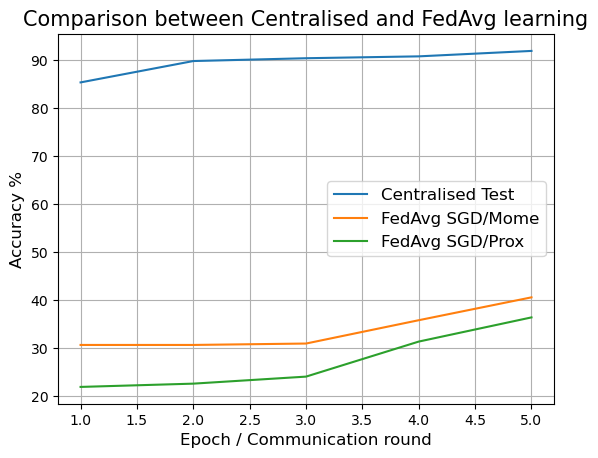

[85.37109375 89.82421875 90.41015625 90.80078125 91.93359375]


In [3]:
def comparison_plotter(centr_df: pd.DataFrame, mome_df: pd.DataFrame, prox_df: pd.DataFrame):
    centr_test_acc = centr_df["test_acc"].values
    centr_train_acc = centr_df["train_acc"].values
    fedavg_mome_acc = np.array(mome_df["test_accuracy"].values)
    fedavg_prox_acc = np.array(prox_df["test_accuracy"].values)
    dx = np.arange(1, len(fedavg_prox_acc) + 1)
    labels=["Centralised Test","FedAvg SGD/Mome","FedAvg SGD/Prox"]
    plt.figure()
    plt.plot(dx, centr_test_acc, label=labels[0])
    plt.plot(dx, fedavg_mome_acc, label=labels[1])
    plt.plot(dx, fedavg_prox_acc, label=labels[2])
    plt.ylabel("Accuracy %", fontsize=12)
    plt.xlabel("Epoch / Communication round", fontsize=12)
    # plt.xlim([0, 103])
    # plt.ylim([20, 100])
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.title("Comparison between Centralised and FedAvg learning", fontsize=15)
    plt.savefig("images/comparison_centr_fedavg.png")
    plt.show()


comparison_plotter(centr_df, mome_df, prox_df)
print(centr_df["test_acc"].values)

In [4]:
def config_file(file_path):
    config_path = Path(file_path[0]).parent / ".hydra" / "config.yaml"
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config

def clients_plot(df1, df2, cfg1, cfg2):
    labels = []
    for cfg in [cfg1, cfg2]:
        str = f"FedAvg {cfg['num_clients_per_round_fit']}/{cfg['num_clients']} clients fit"
        labels.append(str)
    fedavg_accs =[]
    for df in [df1, df2]:
        fedavg_acc = np.array(df["test_accuracy"].values)
        fedavg_accs.append(fedavg_acc)

    dx = np.arange(1, len(fedavg_accs[0]) + 1)
    plt.figure()
    plt.plot(dx, fedavg_accs[0], label=labels[0])
    plt.plot(dx, fedavg_accs[1], label=labels[1])
    plt.ylabel("Accuracy %", fontsize=12)
    plt.xlabel("Communication round", fontsize=12)
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.title("FedAvg comparison between different client fraction fit", fontsize=15)
    plt.savefig("images/comparison_clients_fraction_fit.png")
    plt.show()

{'num_rounds': 5, 'num_clients': 100, 'batch_size': 64, 'num_classes': 4, 'NIID': False, 'subset': True, 'balance': True, 'datapath': 'D:/DesktopC/Datasets/data/', 'num_workers': 1, 'num_clients_per_round_fit': 10, 'num_clients_per_round_eval': 25, 'seed': 2024, 'client_resources': {'num_cpus': 2, 'num_gpus': 0.0}, 'var_local_epochs': False, 'lr_scheduling': True, 'local_epochs': 1, 'model': {'_target_': 'model.ResNet18'}, 'strategy': {'name': 'fedavg'}, 'exp_name': 'momentum', 'optimizer': {'_target_': 'models.train', 'lr': 0.01, 'momentum': 0.9, 'weight_decay': 0.0001, 'gmf': 0, 'mu': 0}}


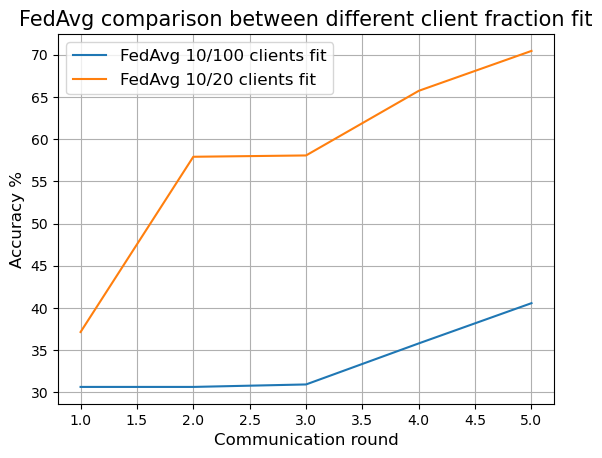

In [5]:

# print(file_names4)
file_names4 = glob.glob(f"outputs/2024-02-12/10-43*/fedavg*.csv")
cfg1 = config_file(file_names2)
cfg2 = config_file(file_names4)
print(cfg1)
mome_df2 = pd.read_csv(file_names4[0])
clients_plot(mome_df, mome_df2, cfg1, cfg2)




In [35]:
# Compare algorithms
save_path: str = "./images/comparisons/"
if not os.path.exists(save_path):
    os.mkdir(save_path)

root_path: str = "./outputs/"
exp_files = glob.glob("outputs/*/*/*B=32*.csv")
print(exp_files)
# exp_files = glob.glob(f"{exp_dirs}/*/*.csv")


def load_exp(optim: str, strat: str, partitioning: str, classes: int):
        for R in [20, 25, 50, 100, 150]:
            for B in [24, 32]:
                exp_dirs = glob.glob(f"outputs/*/*/{strat.lower()}_{optim.lower()}_{partitioning}*_Classes={classes}*_C=10_*_B={B}*_R={R}*.csv")
        return exp_dirs
        # exp_dirs = os.path.join(
        #     root_path,
        #     f"{strat.lower()}_{exp_name.lower()}_{partitioning}_Classes={classes}",
        # )
        # # exp_dirs = "outputs"
        # exp_files = glob.glob(f"{exp_dirs}/*/*.csv")
        # exp_files = glob.glob("outputs/*/*.csv")
        

        # exp_df = [pd.read_csv(f) for f in exp_files]
        # exp_df = [df for df in exp_df if not df.isna().any().any()]

        # assert len(exp_df) >= 1, (
        #     f"Atleast one results file must contain non-NaN values. "
        #     f"NaN values found in all seed runs of {exp_df}"
        # )
        # return exp_df

# exp_dirs = load_exp("scaffold", "scaffold", "iid", 10)
exp_dirs = load_exp("scaffold", "scaffold", "dirichlet", 10)
print(exp_dirs)
exp_dirs2 = load_exp("momentum", "fedavg", "iid", 10)
exp_dirs3 = load_exp("proximal", "fedavg", "iid", 10)
print(exp_dirs2)
print(exp_dirs3)
exp_dfs = [pd.read_csv(f) for f in exp_dirs]
# exp_dfs[0]

['outputs\\2024-03-17\\12-56-28\\scaffold_scaffold_dirichlet_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=4.csv', 'outputs\\2024-03-21\\20-38-45\\scaffold_scaffold_dirichlet_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-24\\21-28-30\\scaffold_scaffold_dirichlet_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=20.csv', 'outputs\\2024-03-25\\11-26-01\\fedavg_momentum_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=2.csv', 'outputs\\2024-03-25\\11-39-51\\fedavg_momentum_iid_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-26\\19-59-01\\fedavg_proximal_iid_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-28\\13-33-07\\fedavg_momentum_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=1.csv', 'outputs\\2024-03-29\\11-12-39\\scaffold_scaffold_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=10.csv', 'outputs\\2024-03-29\\16-

In [45]:
# for R in [20, 25, 50, 100, 150]:
for B in [24, 32]:
    exp_files = glob.glob(f"outputs/*/*/*B={B}*.csv")
        # exp_files = glob.glob(f"outputs/*/*/*B={B}*R={R}*csv")

print(len(exp_files))
print(exp_files)


15
['outputs\\2024-03-17\\12-56-28\\scaffold_scaffold_dirichlet_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=4.csv', 'outputs\\2024-03-21\\20-38-45\\scaffold_scaffold_dirichlet_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-24\\21-28-30\\scaffold_scaffold_dirichlet_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=20.csv', 'outputs\\2024-03-25\\11-26-01\\fedavg_momentum_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=2.csv', 'outputs\\2024-03-25\\11-39-51\\fedavg_momentum_iid_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-26\\19-59-01\\fedavg_proximal_iid_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=100.csv', 'outputs\\2024-03-28\\13-33-07\\fedavg_momentum_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=1.csv', 'outputs\\2024-03-29\\11-12-39\\scaffold_scaffold_iid_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=10.csv', 'outputs\\2024-03-29\\

In [82]:
import yaml

def plot_progress(eval_file, train_file, cid: int, save_str: str):
    # Read CSV files
    eval_df = pd.read_csv(eval_file)
    train_df = pd.read_csv(train_file)

    # Plot accuracies from .csv
    plt.plot(eval_df['server_round'], eval_df['accuracy'], 'o-', markersize=4, label='Eval Accuracy')
    plt.plot(train_df['server_round'], train_df['accuracy'], 'o-', markersize=4, label='Train Accuracy')

    # Add labels and legend
    if cid == 1:
        print(f"{save_str}progress_cid_{cid}.png")
    plt.xlabel('Server round participation')
    plt.ylabel('Accuracy')
    plt.title(f'Comparison of sampled accuracies from client: {cid}')
    plt.legend(loc = 'lower center')
    plt.savefig(f"{save_str}progress_cid_{cid}.png")
    plt.show()
    plt.close()

# exp_files[-1]
    

outputs\2024-03-30\23-40-23
outputs\2024-03-30\23-40-23/.hydra/config.yaml
10
['outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_0.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_1.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_2.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_3.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_4.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_5.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_6.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_7.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_8.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_eval_progress_9.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_fit_progress_0.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_fit_progress_1.csv', 'outputs\\2024-03-30\\23-40-23/clients\\client_fit_progress_2.csv', 'outputs\\2024-03-30\\23-40

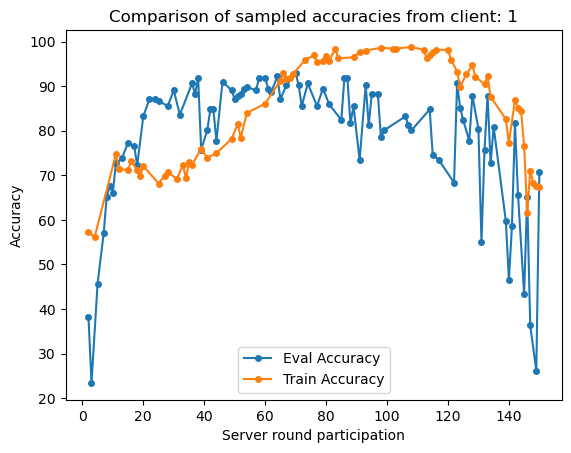

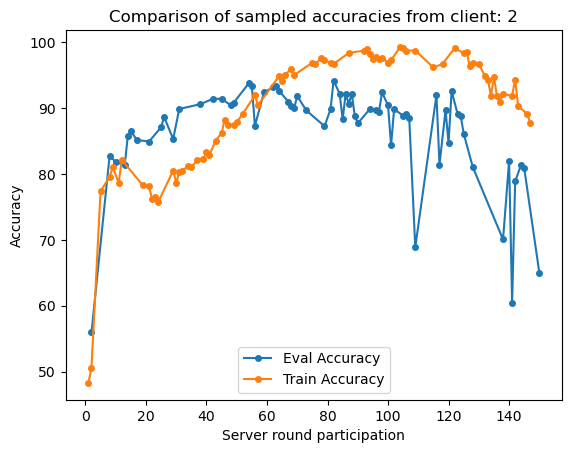

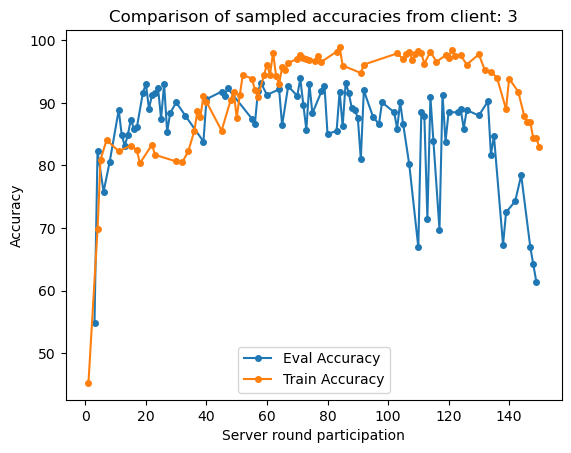

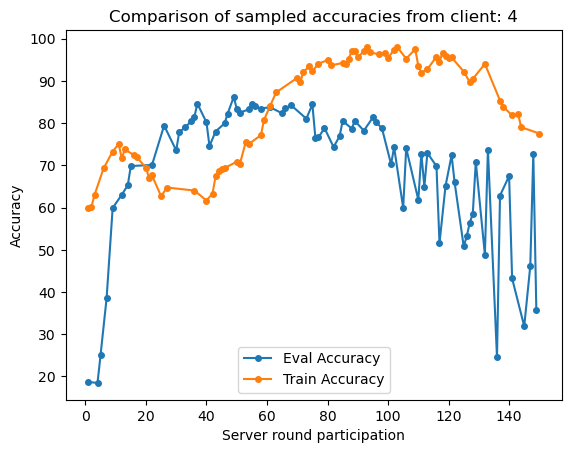

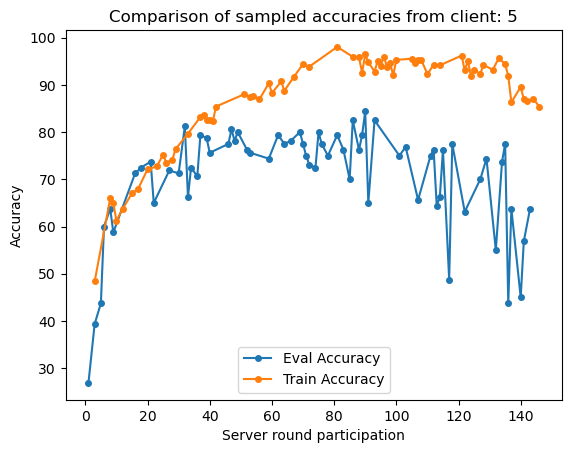

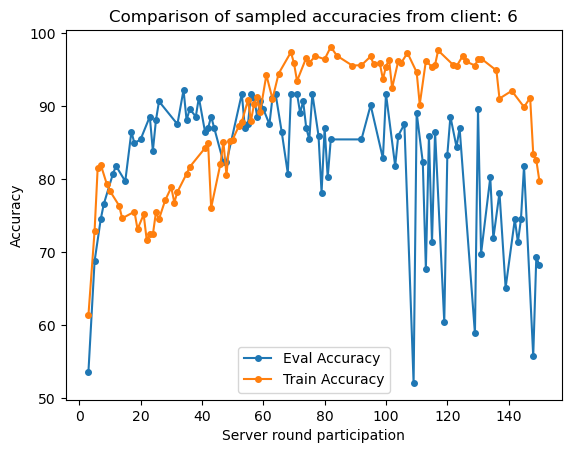

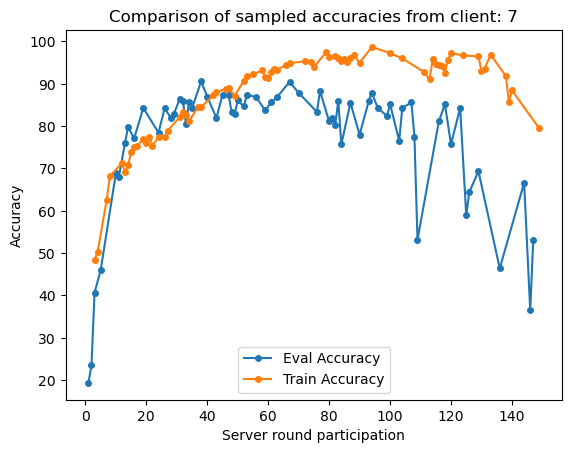

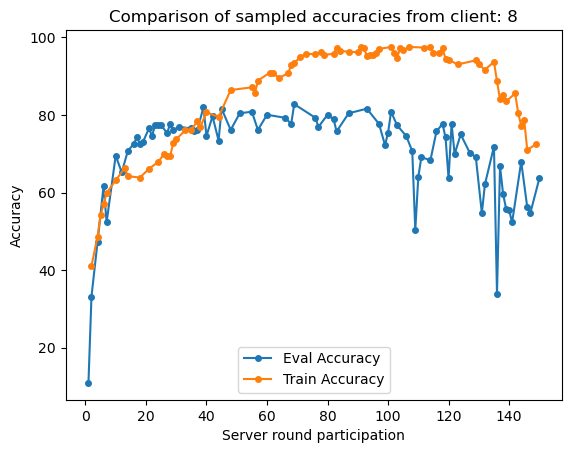

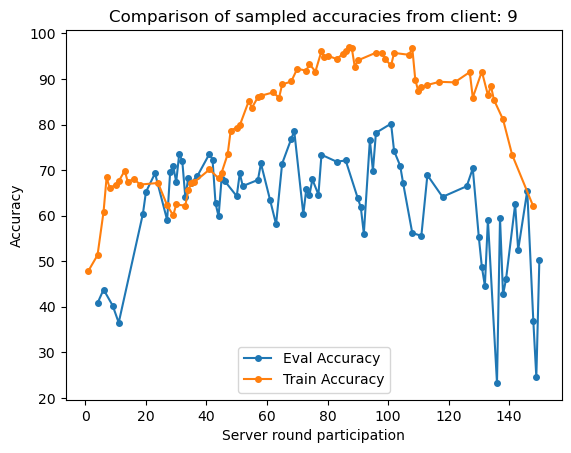

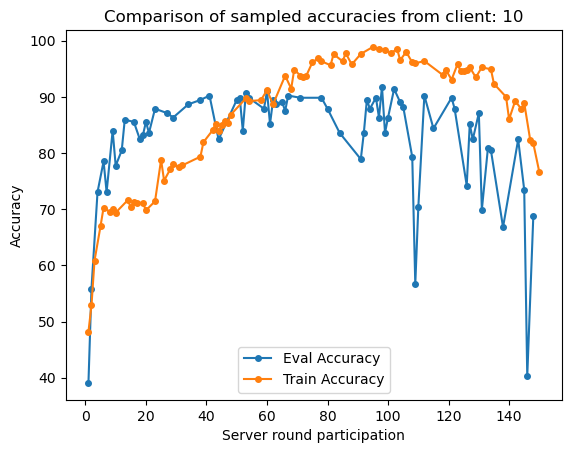

In [83]:
save_path: str = "./images/comparisons/"
if not os.path.exists(save_path):
    os.mkdir(save_path)
exp_file = 'outputs\\2024-03-30\\23-40-23\\scaffold_scaffold_dirichlet_balanced_Classes=10_Seed=2024_C=10_fraction0.5_B=32_E=1_R=150.csv'
up_dir = os.path.dirname(exp_file)
print(up_dir)
config_file = glob.glob(f"{up_dir}/.hydra/config.yaml")[0]
print(config_file)
# Open and read the YAML file
with open(config_file, 'r') as f:
    config_data = yaml.load(f, Loader=yaml.FullLoader)

clients = config_data['num_clients']
print(clients)
clients_dir = glob.glob(f"{up_dir}/clients/client_*progress*")
print(clients_dir)
for cid in range(clients):
    client_cid_cvs = glob.glob(f"{up_dir}/clients/client_*progress_{cid}*")
    plot_progress(client_cid_cvs[0], client_cid_cvs[1], cid+1, save_str=save_path)

In [ ]:
def generate_plots(
    local_solvers: List[str], strategy: List[str], var_epochs: bool, momentum_plot=False
):
    """Compare algorithms"""
    save_path: str = "./images/comparisons/"
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    root_path: str = "./outputs/"

    
    

In [ ]:
def clients_progress():
    

In [23]:
print(len(exp_files))
print(exp_files[0])

15
outputs\2024-03-17\12-56-28\scaffold_scaffold_dirichlet_balanced_Classes=4_Seed=2024_C=10_fraction0.5_B=32_E=1_R=4.csv


In [ ]:
def comparison_plotter(centr_df: pd.DataFrame, mome_df: pd.DataFrame, prox_df: pd.DataFrame):
    centr_test_acc = centr_df["test_acc"].values
    centr_train_acc = centr_df["train_acc"].values
    fedavg_mome_acc = np.array(mome_df["test_accuracy"].values)
    fedavg_prox_acc = np.array(prox_df["test_accuracy"].values)
    dx = np.arange(1, len(fedavg_prox_acc) + 1)
    labels=["Centralised Test","FedAvg SGD/Mome","FedAvg SGD/Prox"]
    plt.figure()
    plt.plot(dx, centr_test_acc, label=labels[0])
    plt.plot(dx, fedavg_mome_acc, label=labels[1])
    plt.plot(dx, fedavg_prox_acc, label=labels[2])
    plt.ylabel("Accuracy %", fontsize=12)
    plt.xlabel("Epoch / Communication round", fontsize=12)
    # plt.xlim([0, 103])
    # plt.ylim([20, 100])
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.title("Comparison between Centralised and FedAvg learning", fontsize=15)
    plt.savefig("images/comparison_centr_fedavg.png")
    plt.show()


comparison_plotter(centr_df, mome_df, prox_df)

In [50]:
def get_confidence_interval(data):
        """Return 95% confidence intervals along with mean."""
        avg = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        lower = avg - 1.96 * std / np.sqrt(len(data))
        upper = avg + 1.96 * std / np.sqrt(len(data))
        return avg, lower, upper

In [51]:
save_path = "_visuals/"
optimizer = "SGD-Momentum"
strategy = "FedAvg"
local_epochs = "1"
var_epochs = False
df = exp_df[0]
data = np.array(df["test_accuracy"].values)
len(data)

NameError: name 'exp_df' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

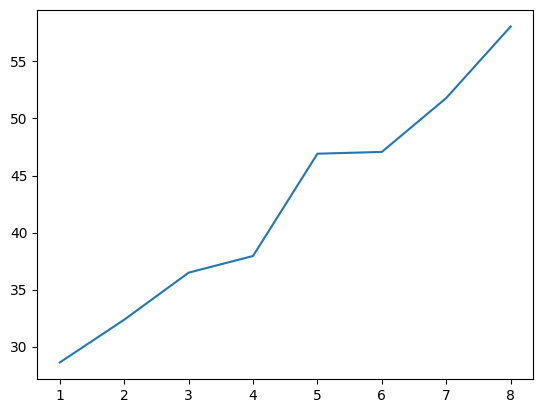

In [ ]:
dx = np.arange(1, len(data) + 1)
dx
plt.plot(dx, data)
plt.show

In [ ]:
save_path = "_visuals/"
optimizer = "SGD-Momentum"
strategy = "FedAvg"
local_epochs = "1"
var_epochs = False
# data_dfs = exp_df[0]
# exp_list = []
# exp_list.append(optimizer, strategy, epochs)
# for i, data_dfs in enumerate(exp_df):
# Iterate over multiple seeds of same experiment
data = np.array([df["test_accuracy"].values for df in exp_df])
mean, lower_ci, upper_ci = get_confidence_interval(data)
print(
        f"---------------------Local Solver: {optimizer}, "
        f"Strategy: {strategy} Local Epochs : {local_epochs}"
        f"---------------------"
    )
print(f"Number of valid(not NaN) seeds for this experiment: {len(df)}")
print(f"Test Accuracy: {mean[-1]:.2f} ± {upper_ci[-1] - mean[-1]:.2f}")

label = strategy
title = f"Local Solver: {optimizer}, Local Epochs: {local_epochs}"
# save_name = ""
epochs = np.arange(1, len(mean) + 1)
plt.plot(epochs, mean, label=label)
plt.fill_between(epochs, lower_ci, upper_ci, alpha=0.3)

plt.ylabel("Test Accuracy %", fontsize=12)
plt.xlabel("Communication rounds", fontsize=12)
plt.xlim([0, 103])
plt.ylim([30, 80])
plt.legend(loc="lower right", fontsize=12)
plt.grid()
plt.title(title, fontsize=15)
plt.savefig(f"{save_path}testAccuracy_{strategy}_varEpochs_{var_epochs}.png")

plt.show()


---------------------Local Solver: SGD-Momentum, Strategy: FedAvg Local Epochs : 1---------------------
Number of valid(not NaN) seeds for this experiment: 8


IndexError: invalid index to scalar variable.

In [ ]:
def generate_plots(
    local_solvers: List[str], strategy: List[str], var_epochs: bool, momentum_plot=False
):
    """Generate plots for all experiments, saved in directory _static."""
    root_path = "multirun/"
    save_path = "_static/"

    def load_exp(exp_name: str, strat: str, var_epoch: bool):
        exp_dirs = os.path.join(
            root_path,
            f"optimizer_{exp_name.lower()}_strategy_"
            f"{strat.lower()}_var_local_epochs_{var_epoch}",
        )
        exp_files = glob.glob(f"{exp_dirs}/*/*.csv")

        exp_df = [pd.read_csv(f) for f in exp_files]
        exp_df = [df for df in exp_df if not df.isna().any().any()]

        assert len(exp_df) >= 1, (
            f"Atleast one results file must contain non-NaN values. "
            f"NaN values found in all seed runs of {exp_df}"
        )
        return exp_df

    def get_confidence_interval(data):
        """Return 95% confidence intervals along with mean."""
        avg = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        lower = avg - 1.96 * std / np.sqrt(len(data))
        upper = avg + 1.96 * std / np.sqrt(len(data))
        return avg, lower, upper

    # create tuple combination of experiment configuration for plotting
    # [("vanilla", "fedavg", True), ("vanilla", "fednova", True)]
    max_exp_len = max([len(local_solvers), len(strategy)])
    optim_exp_len = int(max_exp_len / len(local_solvers))
    strategy_exp_len = int(max_exp_len / len(strategy))
    var_epochs_len = int(max_exp_len)
    exp_list = list(
        zip(
            local_solvers * optim_exp_len,
            strategy * strategy_exp_len,
            [var_epochs] * var_epochs_len,
        )
    )

    exp_data = [load_exp(*args) for args in exp_list]

    # Iterate over each experiment
    plt.figure()
    title = ""
    for i, data_dfs in enumerate(exp_data):
        # Iterate over multiple seeds of same experiment
        combined_data = np.array([df["test_accuracy"].values for df in data_dfs])

        mean, lower_ci, upper_ci = get_confidence_interval(combined_data)

        epochs = np.arange(1, len(mean) + 1)

        optimizer, server_strategy, variable_epoch = exp_list[i]

        # Assign more readable legends for each plot according to paper
        if optimizer == "proximal" and server_strategy == "FedAvg":
            label = "FedProx"
        elif optimizer.lower() in ["server", "hybrid"]:
            label = optimizer
        elif optimizer.lower() == "vanilla" and momentum_plot:
            label = "No Momentum"
        else:
            label = server_strategy

        plt.plot(epochs, mean, label=label)
        plt.fill_between(epochs, lower_ci, upper_ci, alpha=0.3)

        if optimizer == "momentum":
            optimizer_label = "SGD-M"
        elif optimizer == "proximal":
            optimizer_label = "SGD w/ Proximal"
        else:
            optimizer_label = "SGD"

        if var_epochs:
            title = f"Local Solver: {optimizer_label}, Epochs ~ U(2, 5)"
        else:
            title = f"Local Solver: {optimizer_label}, Epochs = 2"

        print(
            f"---------------------Local Solver: {optimizer.upper()}, "
            f"Strategy: {server_strategy.upper()} Local Epochs Fixed: {variable_epoch}"
            f"---------------------"
        )
        print(f"Number of valid(not NaN) seeds for this experiment: {len(data_dfs)}")

        print(f"Test Accuracy: {mean[-1]:.2f} ± {upper_ci[-1] - mean[-1]:.2f}")

    if momentum_plot:
        title = "Comparison of Momentum Schemes: FedNova"
        save_name = "momentum_plot"
    else:
        save_name = local_solvers[0]

    plt.ylabel("Test Accuracy %", fontsize=12)
    plt.xlabel("Communication rounds", fontsize=12)
    plt.xlim([0, 103])
    plt.ylim([30, 80])
    plt.legend(loc="lower right", fontsize=12)
    plt.grid()
    plt.title(title, fontsize=15)
    plt.savefig(f"{save_path}testAccuracy_{save_name}_varEpochs_{var_epochs}.png")

    plt.show()
